In [15]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [16]:
df= pd.read_csv('content/preprocessed_train.csv', index_col=0)

C:\Users\shomer\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [17]:
df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,floor,area,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,month,hour
0,105,0,2016-01-01 00:00:00,23.3036,1,0,50623,1,1,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,1,1,0
1,106,0,2016-01-01 00:00:00,0.3746,1,0,5374,1,0,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,1,1,0
3,107,0,2016-01-01 00:00:00,175.1840,1,0,97532,2,2,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,1,1,0
4,108,0,2016-01-01 00:00:00,91.2653,1,0,81580,1,1,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,1,1,0
5,109,0,2016-01-01 00:00:00,80.9300,1,0,56995,2,1,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,1,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3166112 entries, 0 to 3495552
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int64  
 1   meter               int64  
 2   timestamp           object 
 3   meter_reading       float64
 4   site_id             int64  
 5   primary_use         int64  
 6   square_feet         int64  
 7   floor               int64  
 8   area                int64  
 9   air_temperature     float64
 10  cloud_coverage      float64
 11  dew_temperature     float64
 12  precip_depth_1_hr   float64
 13  sea_level_pressure  float64
 14  wind_direction      float64
 15  wind_speed          float64
 16  day                 int64  
 17  month               int64  
 18  hour                int64  
dtypes: float64(8), int64(10), object(1)
memory usage: 483.1+ MB


In [19]:
df= df[(df['building_id']==122)&(df['meter']==0)]
df.loc[:, "timestamp"] = pd.to_datetime(df.loc[:, "timestamp"])

In [6]:
df= df.set_index('timestamp')

plotting 1 week

In [9]:
y= df.iloc[168+24:168*2+24].meter_reading
#x= range(1,168)

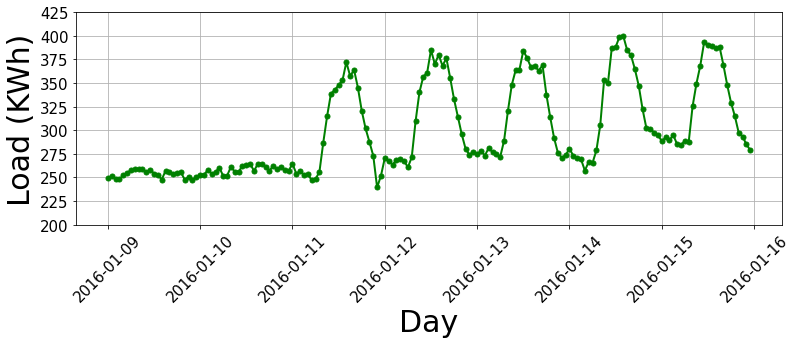

In [43]:
fig, ax= plt.subplots( 1,1, figsize=(11,4) ) 

ax.plot( y , color='green', marker='o', linestyle='-', linewidth=2, markersize=5 )

#ax.set_title('1 Week Load Demand',fontsize=20 )
ax.set_xlabel('Day' ,fontsize=30)
ax.set_ylabel('Load (KWh)' ,fontsize=30)

ax.set_ybound(200,425)
plt.tight_layout()
plt.xticks(rotation = 45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

plt.savefig('week_research.png', bbox_inches='tight', dpi=2000)